In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [3]:
# 데이터 로드
df = pd.read_csv('processed_job_data.csv')

# 데이터 기본 정보 확인
print("데이터 크기:", df.shape)
print("\n컬럼 목록:")
print(df.columns.tolist())
print("\n데이터 타입:")
print(df.dtypes)

데이터 크기: (115, 12)

컬럼 목록:
['company_name', 'post_name', 'registration_date', 'deadline', 'qualification_agent', 'qualification_education', 'qualification_career', 'region', 'Field', 'keywords_list', 'source_info', 'source_type']

데이터 타입:
company_name               object
post_name                  object
registration_date          object
deadline                   object
qualification_agent        object
qualification_education    object
qualification_career       object
region                     object
Field                      object
keywords_list              object
source_info                object
source_type                object
dtype: object


출처별 데이터 수:
source_type
military    74
rndjob      41
Name: count, dtype: int64


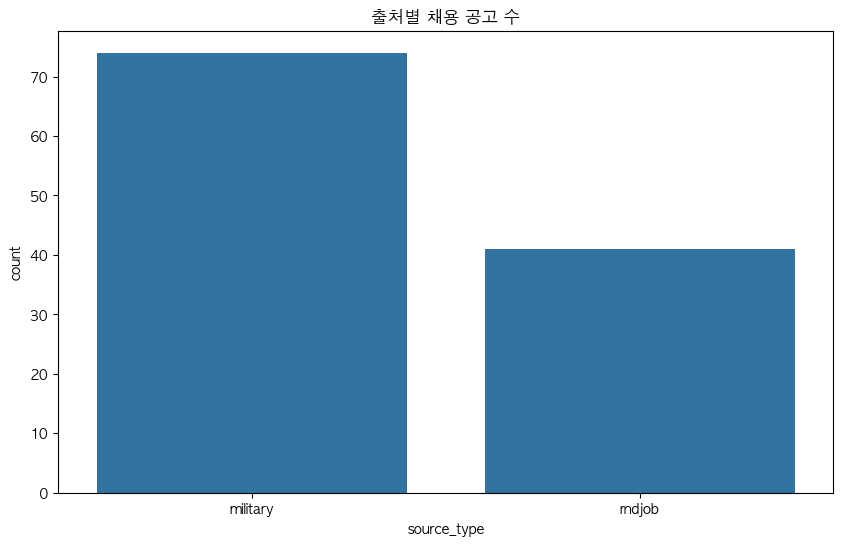

In [4]:
# 출처별 데이터 수 확인
source_counts = df['source_type'].value_counts()
print("출처별 데이터 수:")
print(source_counts)

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='source_type')
plt.title('출처별 채용 공고 수')
plt.show()

In [5]:
# 각 컬럼별 고유값 수 확인
print("각 컬럼별 고유값 수:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}개")

각 컬럼별 고유값 수:
company_name: 71개
post_name: 110개
registration_date: 57개
deadline: 30개
qualification_agent: 3개
qualification_education: 9개
qualification_career: 6개
region: 51개
Field: 92개
keywords_list: 100개
source_info: 115개
source_type: 2개


In [7]:
# 날짜 형식 변환
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['deadline'] = pd.to_datetime(df['deadline'])

# 등록일 기준 월별 채용 공고 수
monthly_posts = df.groupby(df['registration_date'].dt.strftime('%Y-%m'))['source_type'].count()

plt.figure(figsize=(12, 6))
monthly_posts.plot(kind='bar')
plt.title('월별 채용 공고 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: time data "2025.05.12" doesn't match format "%Y-%m-%d", at position 74. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

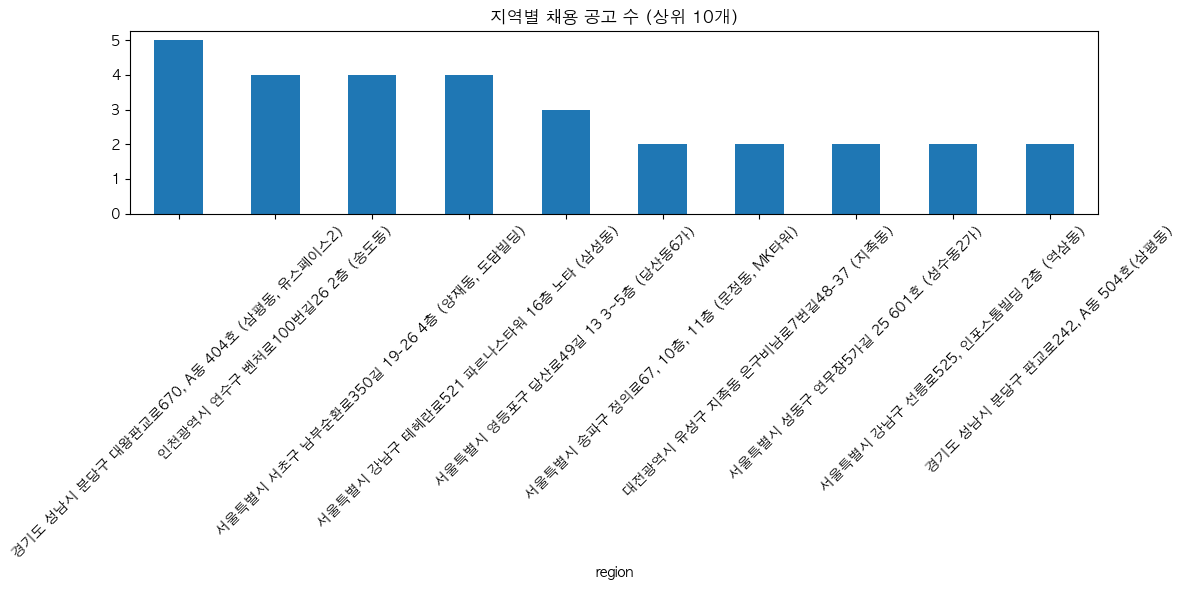

In [8]:
# 지역별 채용 공고 수
region_counts = df['region'].value_counts().head(10)

plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('지역별 채용 공고 수 (상위 10개)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# 키워드 리스트를 문자열로 변환하고 분리
all_keywords = []
for keywords in df['keywords_list']:
    if isinstance(keywords, list):
        all_keywords.extend(keywords)
    elif isinstance(keywords, str):
        all_keywords.extend(eval(keywords))

# 키워드 빈도수 계산
keyword_counts = pd.Series(all_keywords).value_counts().head(20)

plt.figure(figsize=(12, 6))
keyword_counts.plot(kind='bar')
plt.title('상위 20개 키워드 빈도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SyntaxError: invalid decimal literal (<string>, line 8)

In [10]:
# 각 출처별 샘플 데이터 확인
print("Military 데이터 샘플:")
print(df[df['source_type'] == 'military'].head())
print("\nRND Job 데이터 샘플:")
print(df[df['source_type'] == 'rndjob'].head())

Military 데이터 샘플:
       company_name                              post_name registration_date  \
0     실리콘디스플레이기흥연구소                               설계연구원 모집        2025-04-22   
1   (주)케이넷츠 기업부설연구소         이동통신용 중계기 시스템 및 HW 엔지니어 경력직 채용        2025-04-22   
2  (주)디노티시아 기업부설연구소                      [디노티시아] 전문연구요원 채용        2025-04-09   
3     (주)메리테크 부설연구소  (주)메리테크 R&D센터 기구설계 전문연구요원(병역특례) 인력 채용        2025-04-21   
4  (주)호진플라텍부설 기술연구소                        기술연구소 전문연구요원 채용        2024-02-01   

     deadline qualification_agent qualification_education  \
0  2025-05-31                  기타                   석사 이상   
1  2025-05-30                 보충역          대학 졸업(2,3년) 이상   
2  2025-05-31                  현역                   석사 이상   
3  2025-06-17                  현역                   석사 이상   
4  2025-06-12                  현역                   석사 이상   

  qualification_career                                       region  \
0            경력 (3년이상)  경기도 용인시 기흥구 탑실로58번길 8 - 0 3층(실리콘디스플레이 ,공